In [1]:
1+1

2

In [ ]:
include("gravlens.jl")

In [4]:
hx, hy, hu, hdu, hia, hoa, hda, hθ =
    harmonic(1.0, 200.0, pi/58, 0.0000001, 10000);
dx, dy, du, ddu, dia, doa, dda, dθ =
numeric_tiso(1.0, 200.0, π/58, R200(1.0, 200.0), 0.0000001, 10000);
tx, ty, tu, tdu, tia, toa, tda, tθ =
    thin_tiso(1.0, 200.0, π/58, R200(1.0, 200.0), 0.0000001, 10000);

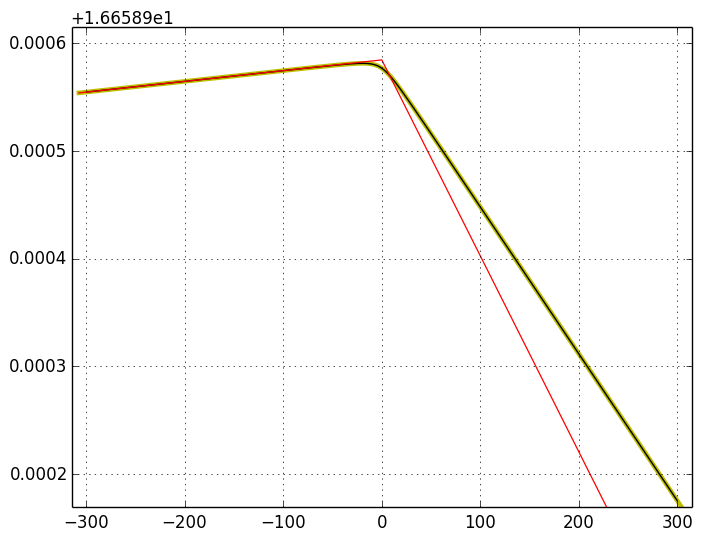

  likely near /Users/ariel/.julia/v0.5/IJulia/src/kernel.jl:35
in show at /Users/ariel/.julia/v0.5/PyPlot/src/PyPlot.jl


In [5]:
ixs = find((hx.>-300).*(hx.<300))
hx=hx[ixs]
hy=hy[ixs]
plot(dx, dy, "-y", lw=3.3)
hold(true)
plot(hx, hy, "-k")
plot(tx, ty, "-r", lw=0.9)
x0 = cos(pi/6)*R200(1.0,200)
y0 = sin(pi/6)*R200(1.0,200)
plot([-x0, x0], [y0, y0+0.000001*2x0],"--k")
xlim(minimum(hx)*1.05, maximum(hx)*1.05)
ylim(minimum(hy)*0.9999996, maximum(hy)*1.000002)
grid(true)

In [6]:
rs = 3.3e6
b = 4

tg = b/rs
dx, dy, du, ddu, dia, doa, dda, dθ =
    numeric_tiso(0.1, 200.0, 0.0, rs, tg, 100000);

spl = Spline1D(dθ, du, k=5);
@show θ0 = fzero(t->evaluate(spl,t)-1.0/R200(0.1,200) , 0.005)
spl = Spline1D(dθ, ddu, k=5);
tgα0 = tan(ray_angle(θ0, R200(0.1,200), evaluate(spl, θ0)))

hx, hy, hu, hdu, hia, hoa, hda, hθ =
    harmonic(0.1, 200.0, θ0, tgα0, 100000);
tx, ty, tu, tdu, tia, toa, tda, tθ =
    thin_tiso(0.1, 200.0, 0.0, rs, tg, 100000);
ex, ey, eu, edu, eia, eoa, eda, eθ =
    numeric_tiso_el(0.1, 200.0, 0.0, rs, tg, 100000);
eex, eey, eeu, eedu, eeia, eeoa, eeda, eeθ =
    numeric_tiso_el(0.1, 200.0, 0.0, rs, tg, 100000);

ix=find(eu.==maximum(eu))[1]
x=ex[ix]
y=ey[ix]
rmin=sqrt(x*x+y*y)

hex, hey, heu, heθ, heia = harmonic_e(0.1, 200.0, rmin, tgα0, 100000);

θ0 = fzero((t->begin  # In[6], line 9:
                evaluate(spl,t) - 1.0 / R200(0.1,200)
            end),0.005) = 0.019507065827297002
dα = (π / 2 + a1) - a2 = 1.5707969383842555
dα - π / 2 = 6.115893589342392e-7


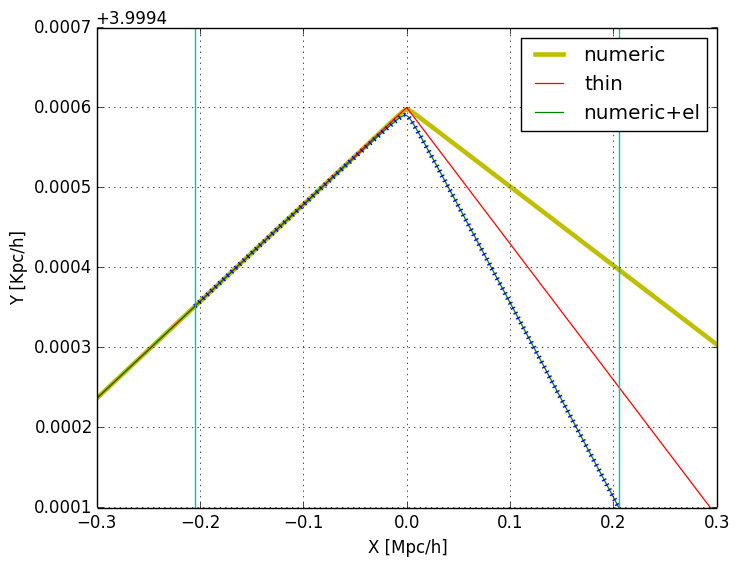

(3.9995,4.0001)

In [7]:
plot(dx/1e3, dy, "-y",lw=3.3)
hold(true)
plot(tx/1e3, ty, "-r",lw=0.9)
plot(ex/1e3, ey, "-g",lw=0.9)
plot(hex/1e3, hey, ":b",lw=3.5)


#plot(eex/1e3, eey, "--k",lw=0.9)
legend(["numeric","thin","numeric+el"], loc=1)
grid(true)
xlabel("X [Mpc/h]")
ylabel("Y [Kpc/h]")
r=R200(0.1,200)
x=cos(linspace(0,2π,500)).*r
y=sin(linspace(0,2π,500)).*r
plot(x/1e3,y,"-c")
xlim(-0.3,0.3)
ylim(3.9995,4.0001)

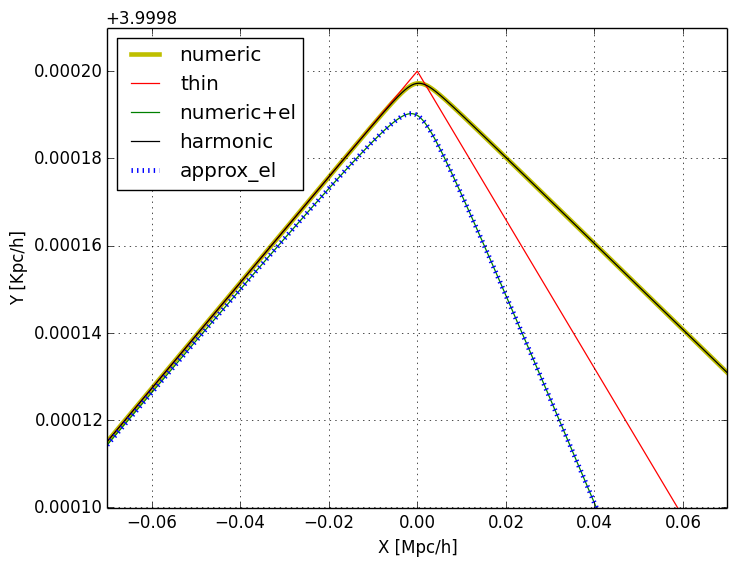

(3.9999,4.00001)

In [8]:
plot(dx/1e3, dy, "-y",lw=3.3)
hold(true)
plot(tx/1e3, ty, "-r",lw=0.9)
plot(ex/1e3, ey, "-g",lw=0.9)
plot(hx/1e3, hy, "-k",lw=0.9)
plot(hex/1e3,hey,":b",lw=3.5)
legend(["numeric","thin","numeric+el","harmonic","approx_el"], loc=2)
grid(true)
xlabel("X [Mpc/h]")
ylabel("Y [Kpc/h]")
xlim(-0.07,0.07)
ylim(3.9999,4.00001)

In [18]:
bs=Float64[]
tdas=Float64[]
ddas=Float64[]
edas=Float64[]

rs = 3.3e6
for b in linspace(4, 500, 100)
    println(b)
    push!(bs, b)

    tg = b/rs
    dx, dy, du, ddu, dia, doa, dda, dθ =
        numeric_tiso(0.1, 500.0, 0.0, rs, tg, 100000);
    tx, ty, tu, tdu, tia, toa, tda, tθ =
        thin_tiso(0.1, 500.0, 0.0, rs, tg, 100000);
    ex, ey, eu, edu, eia, eoa, eda, eθ =
    numeric_tiso_el(0.1, 500.0, 0.0, rs, tg, 100000);
    
    push!(tdas, tda)
    push!(ddas, dda)
    push!(edas, eda);
end;

4.0
9.01010101010101
14.02020202020202
19.03030303030303
24.04040404040404
29.050505050505052
34.06060606060606
39.07070707070707
44.08080808080808
49.09090909090909
54.101010101010104
59.111111111111114
64.12121212121212
69.13131313131314
74.14141414141415
79.15151515151516
84.16161616161617
89.17171717171718
94.18181818181819
99.1919191919192
104.20202020202021
109.21212121212122
114.22222222222223
119.23232323232324
124.24242424242425
129.25252525252526
134.26262626262627
139.27272727272728
144.2828282828283
149.2929292929293
154.3030303030303
159.31313131313132
164.32323232323233
169.33333333333334
174.34343434343435
179.35353535353536
184.36363636363637
189.37373737373738
194.3838383838384
199.3939393939394
204.40404040404042
209.41414141414143
214.42424242424244
219.43434343434345
224.44444444444446
229.45454545454547
234.46464646464648
239.4747474747475
244.4848484848485
249.4949494949495
254.5050505050505
259.5151515151515
264.52525252525254
269.5353535353535
274.54545454545456

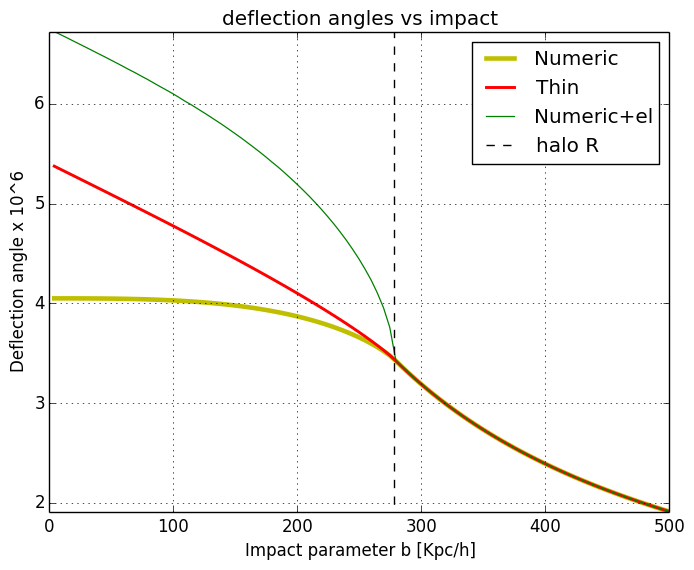

PyObject <matplotlib.text.Text object at 0x318b33a90>

In [20]:
plot(bs, ddas*1e6, "-y", lw=3.3)
hold(true)
plot(bs, tdas*1e6, "-r", lw=2.1)
plot(bs, edas*1e6, "-g", lw=0.9)
r=R200(0.1,500.0)
plot([r,r],[0,1e7],"--k")
ylim(1e6*minimum(tdas), 1e6*maximum(edas))
grid(true)
xlabel("Impact parameter b [Kpc/h]")
ylabel("Deflection angle x 10^6")
legend(["Numeric","Thin","Numeric+el","halo R"])
title("deflection angles vs impact")

In [4]:
massfunc(r) = tnfw_m(0.1, 500.0, 20.0, r);
rhofunc(r) = tnfw_ρ(0.1, 500.0, 20.0, r);
massSpl, rp, m = prepare_proj_mass(massfunc, 0.1, 3000000);
projmass(r) = project_mass(massSpl, r);

In [316]:
R200(0.1,500)/20

13.915066228117846

In [12]:
bs=Float64[]
nfw_tdas=Float64[]
nfw_ddas=Float64[]
nfw_edas=Float64[]

rs = 3.3e6
for b in linspace(0.5, 7, 100)
    println(b)
    push!(bs, b)

    tg = b/rs
    dx, dy, du, ddu, dia, doa, dda, dθ =
        numeric(massfunc, 0.0, rs, tg, 100000);
    tx, ty, tu, tdu, tia, toa, tda, tθ =
        thin(projmass, 0.0, rs, tg, 100000);
    ex, ey, eu, edu, eia, eoa, eda, eθ =
    numeric_el(massfunc, rhofunc, 0.0, rs, tg, 100000; reltol=1.0e-19, abstol=1.0e-19);
    
    push!(nfw_tdas, tda)
    push!(nfw_ddas, dda)
    push!(nfw_edas, eda);
end;

0.5
0.5656565656565656
0.6313131313131313
0.696969696969697
0.7626262626262627
0.8282828282828283
0.8939393939393939
0.9595959595959596
1.0252525252525253
1.0909090909090908
1.1565656565656566
1.2222222222222223
1.2878787878787878
1.3535353535353536
1.4191919191919191
1.4848484848484849
1.5505050505050506
1.6161616161616161
1.6818181818181819
1.7474747474747474
1.8131313131313131
1.878787878787879
1.9444444444444444
2.01010101010101
2.0757575757575757
2.1414141414141414
2.207070707070707
2.272727272727273
2.3383838383838382
2.404040404040404
2.4696969696969697
2.5353535353535355
2.601010101010101
2.6666666666666665
2.7323232323232323
2.797979797979798
2.8636363636363638
2.9292929292929295
2.994949494949495
3.0606060606060606
3.1262626262626263
3.191919191919192
3.257575757575758
3.323232323232323
3.388888888888889
3.4545454545454546
3.5202020202020203
3.585858585858586
3.6515151515151514
3.717171717171717
3.782828282828283
3.8484848484848486
3.914141414141414
3.9797979797979797
4.04545

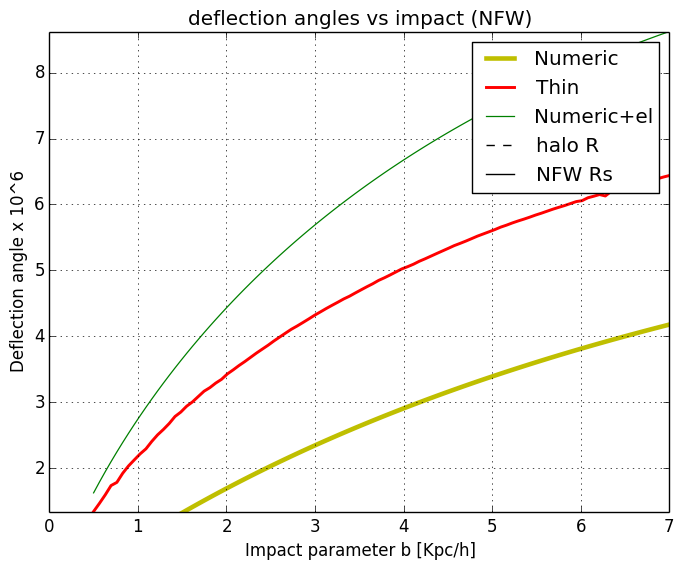

(0,7)

In [13]:
plot(bs, nfw_ddas*1e6, "-y", lw=3.3)
hold(true)
plot(bs, nfw_tdas*1e6, "-r", lw=2.1)
plot(bs, nfw_edas*1e6, "-g", lw=0.9)
r=R200(0.1,500.0)
plot([r,r],[0,1e7],"--k")
plot([20.0,20.0],[0,1e7],"-k")
ylim(1e6*minimum(nfw_tdas), 1e6*maximum(nfw_edas))
grid(true)
xlabel("Impact parameter b [Kpc/h]")
ylabel("Deflection angle x 10^6")
legend(["Numeric","Thin","Numeric+el","halo R", "NFW Rs"])
title("deflection angles vs impact (NFW)")
xlim(0,7)

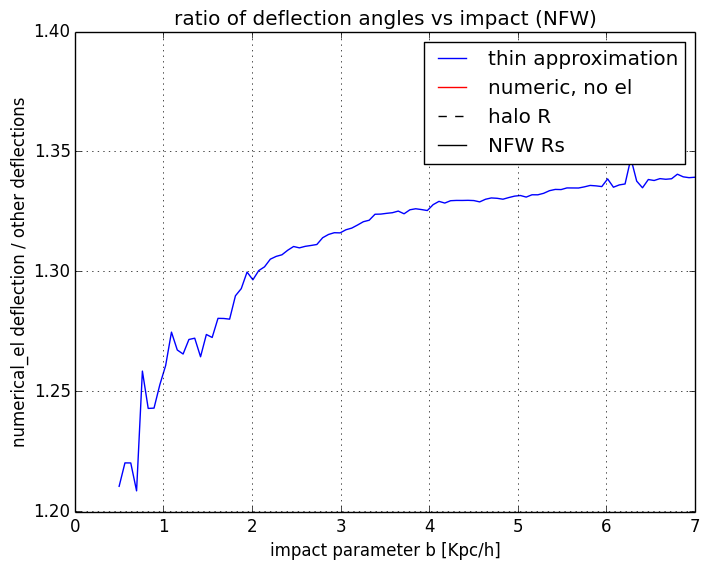

(1.2,1.4)

In [14]:
plot(bs, nfw_edas./nfw_tdas,"-b")
hold(true)
plot(bs, nfw_edas./nfw_ddas, "-r")
plot([278,278],[0.8,2.4],"--k")
plot([20.0,20.0],[0.8,2.4],"-k")
grid(true)
xlabel("impact parameter b [Kpc/h]")
ylabel("numerical_el deflection / other deflections")
legend(["thin approximation","numeric, no el","halo R","NFW Rs"], loc=1)
title("ratio of deflection angles vs impact (NFW)")
xlim(0,7)
ylim(1.2,1.4)

# Time

In [273]:
b = 3.0;
rs = 3.3e6;
tg = b/rs
f = 1.14
up_dx, up_dy, up_du, up_ddu, up_dia, up_doa, up_dda, up_dθ =
    numeric(massfunc, 0.0, rs, tg, 100000);
up_tx, up_ty, up_tu, up_tdu, up_tia, up_toa, up_tda, tθ =
thin(projmass, 0.0, rs*f, tg, 100000);
up_ex, up_ey, up_eu, up_edu, up_eia, up_eoa, up_eda, up_eθ =
    numeric_el(massfunc, rhofunc, 0.0, rs, tg, 100000; reltol=1.0e-19, abstol=1.0e-19);

b = 7.0;
rs = 3.3e6;
tg = b/rs
down_dx, down_dy, down_du, down_ddu, down_dia, down_doa, down_dda, down_dθ =
    numeric(massfunc, 0.0, rs, tg, 100000);
down_tx, down_ty, down_tu, down_tdu, down_tia, down_toa, down_tda, down_tθ =
    thin(projmass, 0.0, rs*f, tg, 100000);
down_ex, down_ey, down_eu, down_edu, down_eia, down_eoa, down_eda, down_eθ =
    numeric_el(massfunc, rhofunc, 0.0, rs, tg, 100000; reltol=1.0e-19, abstol=1.0e-19);

In [7]:
function extrapolate_to_meeting(x1,y1,x2,y2)
    dx1 = x1[end]-x1[end-10]
    dy1 = y1[end]-y1[end-10]
    tg1 = dy1/dx1
    dx2 = x2[end]-x2[end-10]
    dy2 = -(y2[end]-y2[end-10])
    tg2 = dy2/dx2

#    y1[end-100] + DX1*tg1 == -y2[end-100] + DX2*tg2
#    x1[end-100] + DX1     == x2[end-100] + DX2
    
    DX2 = (-y1[end-10]-x2[end-10]*tg1+x1[end-10]*tg1-y2[end-10])./(tg1-tg2)
    X = x2[end-10] + DX2
    Y = -y2[end-10] + DX2*tg2
    
    xx1 = x1[x1.<X]
    yy1 = y1[x1.<X]
    xx2 = x2[x2.<X]
    yy2 = y2[x2.<X]
    push!(xx1, X)
    push!(xx2, X)

    push!(yy1, Y)
    push!(yy2, -Y)

    xx1,yy1, xx2,yy2
end

extrapolate_to_meeting (generic function with 1 method)

In [275]:
utx,uty,dtx,dty = extrapolate_to_meeting(up_tx,up_ty,down_tx,down_ty);
udx,udy,ddx,ddy = extrapolate_to_meeting(up_dx,up_dy,down_dx,down_dy);
uex,uey,dex,dey = extrapolate_to_meeting(up_ex,up_ey,down_ex,down_ey);

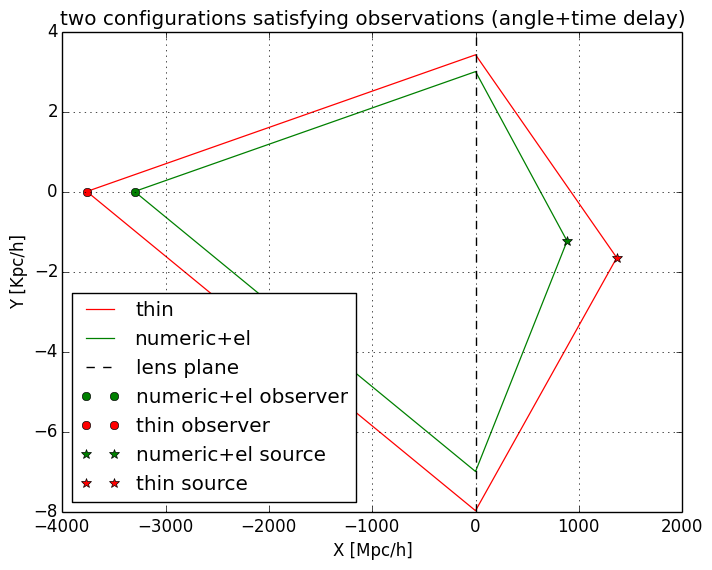

PyObject <matplotlib.text.Text object at 0x34adf46d0>

In [313]:
hold(false)
plot(utx/1e3,uty,"-r",lw=0.9,label="thin")
hold(true)
plot(dtx/1e3,-dty,"-r",lw=0.9)
#plot(udx/1e3,udy,"-y",lw=0.9)
#plot(ddx/1e3,-ddy,"-y",lw=0.9)
plot(uex/1e3,uey,"-g",lw=0.9, label="numeric+el")
plot(dex/1e3,-dey,"-g",lw=0.9)
plot([0,0],[-8,4],"--k", label="lens plane")
plot([uex[1]/1e3],[uey[1]],"og",label="numeric+el observer")
plot([utx[1]/1e3],[uty[1]],"or",label="thin observer")

plot([uex[end]/1e3],[uey[end]],"*g",ms=7, label="numeric+el source")
plot([utx[end]/1e3],[uty[end]],"*r",ms=7, label="thin source")

hold(false)
grid(true)
xlabel("X [Mpc/h]")
ylabel("Y [Kpc/h]")
#legend(["thin","", "numeric+el","", "lens plane"], loc=3)
legend(loc=3)
title("two configurations satisfying observations (angle+time delay)")

In [278]:
udt = time(massfunc, udx, udy);
ddt = time(massfunc, ddx, ddy);
delta_d = abs(udt-ddt);
utt = time(massfunc, utx, uty);
dtt = time(massfunc, dtx, dty);
delta_t = abs(utt-dtt);
uet = time(massfunc, uex, uey);
det = time(massfunc, dex, dey);
delta_e = abs(uet-det);
@show delta_t;
@show delta_d;
@show delta_e;

delta_t = 6.347278258544975e-11
delta_d = 4.96243046654854e-11
delta_e = 6.340350466871314e-11


# Time 2

In [36]:
b = 3.0;
rs = 3.3e6;
tg = b/rs
f = 1.2135
up_tx, up_ty, up_tu, up_tdu, up_tia, up_toa, up_tda, tθ =
thin(r->projmass(r)*f, 0.0, rs, tg, 100000);
up_ex, up_ey, up_eu, up_edu, up_eia, up_eoa, up_eda, up_eθ =
    numeric_el(massfunc, rhofunc, 0.0, rs, tg, 100000; reltol=1.0e-19, abstol=1.0e-19);

b = 7.0;
rs = 3.3e6;
tg = b/rs
down_tx, down_ty, down_tu, down_tdu, down_tia, down_toa, down_tda, down_tθ =
thin(r->projmass(r)*f, 0.0, rs, tg, 100000);
down_ex, down_ey, down_eu, down_edu, down_eia, down_eoa, down_eda, down_eθ =
    numeric_el(massfunc, rhofunc, 0.0, rs, tg, 100000; reltol=1.0e-19, abstol=1.0e-19);

In [37]:
utx,uty,dtx,dty = extrapolate_to_meeting(up_tx,up_ty,down_tx,down_ty);
uex,uey,dex,dey = extrapolate_to_meeting(up_ex,up_ey,down_ex,down_ey);

utt = time(massfunc, utx, uty);
dtt = time(massfunc, dtx, dty);
delta_t = abs(utt-dtt);
uet = time(massfunc, uex, uey);
det = time(massfunc, dex, dey);
delta_e = abs(uet-det);
@show delta_t;
@show delta_e;

delta_t = 6.340350466871314e-11
delta_e = 6.340350466871314e-11


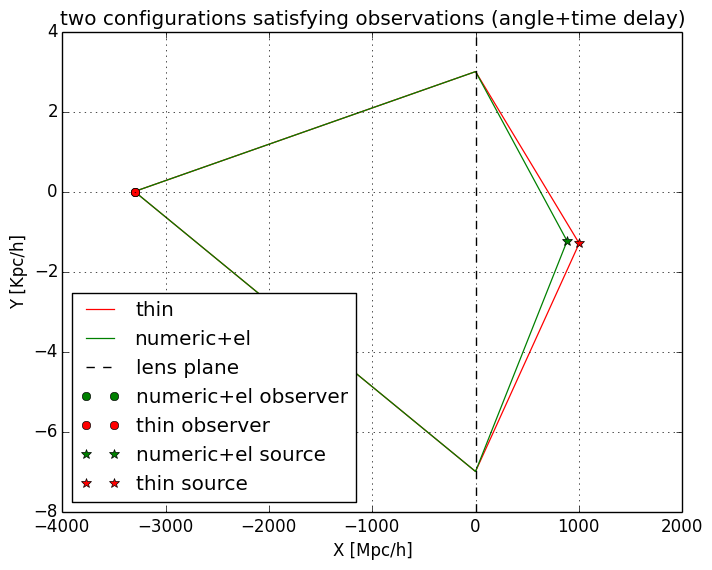

  likely near /Users/ariel/.julia/v0.5/IJulia/src/kernel.jl:35
in show at /Users/ariel/.julia/v0.5/PyPlot/src/PyPlot.jl


PyObject <matplotlib.text.Text object at 0x31e8f4790>

  likely near /Users/ariel/.julia/v0.5/IJulia/src/kernel.jl:35
  likely near /Users/ariel/.julia/v0.5/IJulia/src/kernel.jl:35
  likely near /Users/ariel/.julia/v0.5/IJulia/src/kernel.jl:35
  likely near /Users/ariel/.julia/v0.5/IJulia/src/kernel.jl:35
  likely near /Users/ariel/.julia/v0.5/IJulia/src/kernel.jl:35
  likely near /Users/ariel/.julia/v0.5/IJulia/src/kernel.jl:35
  likely near /Users/ariel/.julia/v0.5/IJulia/src/kernel.jl:35
  likely near /Users/ariel/.julia/v0.5/IJulia/src/kernel.jl:35
  likely near /Users/ariel/.julia/v0.5/IJulia/src/kernel.jl:35
  likely near /Users/ariel/.julia/v0.5/IJulia/src/kernel.jl:35


In [38]:
hold(false)
plot(utx/1e3,uty,"-r",lw=0.9,label="thin")
hold(true)
plot(dtx/1e3,-dty,"-r",lw=0.9)
plot(uex/1e3,uey,"-g",lw=0.9, label="numeric+el")
plot(dex/1e3,-dey,"-g",lw=0.9)
plot([0,0],[-8,4],"--k", label="lens plane")
plot([uex[1]/1e3],[uey[1]],"og",label="numeric+el observer")
plot([utx[1]/1e3],[uty[1]],"or",label="thin observer")

plot([uex[end]/1e3],[uey[end]],"*g",ms=7, label="numeric+el source")
plot([utx[end]/1e3],[uty[end]],"*r",ms=7, label="thin source")

hold(false)
grid(true)
xlabel("X [Mpc/h]")
ylabel("Y [Kpc/h]")
#legend(["thin","", "numeric+el","", "lens plane"], loc=3)
legend(loc=3)
title("two configurations satisfying observations (angle+time delay)")